In [1]:
from datetime import date
from src.market import Market
from src.portfolio import Portfolio
from src.analysis import Analysis, Benchmark, Metric
from src.rebalance import Rebalance
from src.strategy import NoStrategy, StopGainAndLoss
from src.backtest import BackTest
from src.factor.gyf import SalesGrowthFactor
from src.factor.const import SECTOR_ETF

In [2]:
start_date = date.fromisoformat("2022-01-01")
end_date = date.fromisoformat("2022-12-21")
security_universe = SECTOR_ETF

market = Market(security_universe)

In [3]:
### Long factor
long_factor = SalesGrowthFactor(security_universe, start_date, end_date, "long")
long_position = long_factor.get_position(start_date)
long_portfolio = Portfolio(100.0, start_date, end_date)
long_factor.set_portfolio_at_start(long_portfolio, long_position)

blacklist = []
strategy = StopGainAndLoss(long_portfolio, blacklist)
strategy.set_limit(0.3, 0.3)
rebalance = Rebalance(60, long_portfolio, long_factor, blacklist)

backtest = BackTest(long_portfolio, strategy, market, rebalance)
backtest.run()

print(long_portfolio.value_book)

sector signal value:
                     sector        date  simply_signal  weighted_signal  \
10  Consumer Discretionary  2021-12-31     186.141531        51.104157   
6   Communication Services  2021-12-31      13.377841        14.734072   
1              Real Estate  2021-12-31      12.726273        12.726759   
9   Information Technology  2021-12-31      11.863732        10.584955   
4              Industrials  2021-12-31      10.447279         9.151304   
7              Health Care  2021-12-31      12.251908         8.328347   
3                Materials  2021-12-31       7.972111         7.763921   
0                   Energy  2021-12-31      11.493692         7.671703   
2                Utilities  2021-12-31       2.306656         4.920042   
8         Consumer Staples  2021-12-31       3.902586         4.537353   
5               Financials  2021-12-31       6.349979         3.857885   

    debug_signal  
10     51.104157  
6      14.734072  
1      12.726759  
9      10.584

In [4]:
### Short factor
short_factor = SalesGrowthFactor(security_universe, start_date, end_date, "short")
short_position = short_factor.get_position(start_date)
short_portfolio = Portfolio(100.0, start_date, end_date)
short_factor.set_portfolio_at_start(short_portfolio, short_position)

blacklist = []
strategy = StopGainAndLoss(short_portfolio, blacklist)
strategy.set_limit(0.3, 0.3)
rebalance = Rebalance(60, short_portfolio, short_factor, blacklist)

backtest = BackTest(short_portfolio, strategy, market, rebalance)
backtest.run()

print(short_portfolio.value_book)

sector signal value:
                     sector        date  simply_signal  weighted_signal  \
4   Consumer Discretionary  2021-12-31     186.141531        51.104157   
10  Communication Services  2021-12-31      13.377841        14.734072   
7              Real Estate  2021-12-31      12.726273        12.726759   
2   Information Technology  2021-12-31      11.863732        10.584955   
11             Industrials  2021-12-31      10.447279         9.151304   
6              Health Care  2021-12-31      12.251908         8.328347   
0                Materials  2021-12-31       7.972111         7.763921   
5                   Energy  2021-12-31      11.493692         7.671703   
1                Utilities  2021-12-31       2.306656         4.920042   
3         Consumer Staples  2021-12-31       3.902586         4.537353   
9               Financials  2021-12-31       6.349979         3.857885   

    debug_signal  
4      51.104157  
10     14.734072  
7      12.726759  
2      10.584

portfolio annulized return: -0.3260612678290751
portfolio annulized return relative to benchmark: -0.12975543749162843
information ratio: -0.00346382196003202


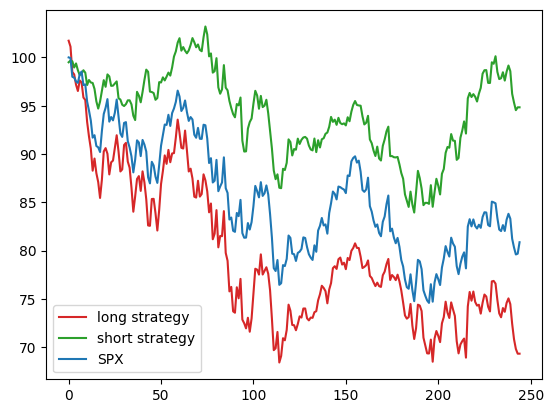

In [5]:
### plot
benchmark = Benchmark("^SPX", start_date, end_date).get_performance()

metric = Metric(long_portfolio, benchmark)
print(f"portfolio annulized return: {metric.annualized_return()}")
print(
    f"portfolio annulized return relative to benchmark: {metric.annualized_return_relative_to_benchmark()}"
)
print(f"information ratio: {metric.information_ratio()}")

analysis = Analysis(
    [long_portfolio, short_portfolio],
    ["long strategy", "short strategy"],
    benchmark,
    "SPX",
)
analysis.draw()